In [ ]:
##테이터 증식 진행 후 학습

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model,Sequential
import zipfile
from keras import optimizers
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array


In [2]:
train_path = '/Users/bh/kears/iamge/train'

In [3]:
classes = 3
height = 128
width = 128
channels = 3

In [4]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/128, 
                                                                  validation_split=0.2,
                                                                  rotation_range=40,
                                                                  width_shift_range=0.2,
                                                                  height_shift_range=0.2,
                                                                  shear_range=0.2,
                                                                  zoom_range=0.2,
                                                                  horizontal_flip=True,
                                                                  vertical_flip=True,
                                                                  fill_mode='nearest') ##여러가지 옵션으로 데이터 증식 진행
                                                                 
image_data_train = image_generator.flow_from_directory(train_path,subset='training')
image_data_test = image_generator.flow_from_directory(train_path,subset='validation')

Found 1046 images belonging to 3 classes.
Found 259 images belonging to 3 classes.


In [5]:
## Data augument 한 사진 저장하기
#img = load_img('/Users/bh/adl.png')  
#x = img_to_array(img)  
#x = x.reshape((1,) + x.shape)  


#i = 0
#for batch in image_generator.flow(x, batch_size=1,
#                          save_to_dir='/Users/bh/adle aug' , save_prefix='adel', save_format='jpg'):
#    i += 1
#    if i > 20:
#        break 

In [6]:
resnet50 = tf.keras.applications.resnet50.ResNet50(
           include_top=False,
           weights=None,
           input_tensor=None,
           input_shape=(height,width,channels),
           pooling=None,
           classes=3,
           #**kwargs
)

In [7]:
resnet50.trainable=True

In [8]:
model = Sequential([
                 resnet50,
                 Dense(512,activation='relu'),
                 BatchNormalization(),
                 GlobalAveragePooling2D(),
                 Dense(classes,activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 dense (Dense)               (None, 4, 4, 512)         1049088   
                                                                 
 batch_normalization (Batch  (None, 4, 4, 512)         2048      
 Normalization)                                                  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 24640387 (94.00 MB)
Trainable params: 2458

In [10]:
model.compile(optimizer=optimizers.legacy.Adam(learning_rate=0.00003),loss='categorical_crossentropy',metrics='accuracy')
##콜백 함수로 fit에 넣어주면 학습중 학습률를 변경할 수 있다.
##사용하지 않음
#def scheduler(epoch, lr):
#    if epoch < 2:
#        return lr
#    else:
#        return lr * tf.math.exp(-0.1)
#lrs = tf.keras.callbacks.LearningRateScheduler(scheduler)
#model.fit(image_data_train,batch_size=32,epochs=5,callbacks=[lrs],validation_data=(image_data_test),
#          validation_steps =image_data_test.samples/image_data_test.batch_size)
hist = model.fit(image_data_train,batch_size=32,epochs=50,validation_data=(image_data_test),
          validation_steps =image_data_test.samples/image_data_test.batch_size)

Epoch 1/50
33/33 [==============================] - 51s 1s/step - loss: 1.0881 - accuracy: 0.3948 - val_loss: 1.0958 - val_accuracy: 0.3745
Epoch 2/50
33/33 [==============================] - 47s 1s/step - loss: 1.0571 - accuracy: 0.4398 - val_loss: 1.1055 - val_accuracy: 0.3745
Epoch 3/50
33/33 [==============================] - 47s 1s/step - loss: 1.0488 - accuracy: 0.4407 - val_loss: 1.1201 - val_accuracy: 0.3745
Epoch 4/50
33/33 [==============================] - 47s 1s/step - loss: 1.0280 - accuracy: 0.4608 - val_loss: 1.1714 - val_accuracy: 0.3745
Epoch 5/50
33/33 [==============================] - 49s 1s/step - loss: 1.0182 - accuracy: 0.4895 - val_loss: 1.1631 - val_accuracy: 0.3745
Epoch 6/50
33/33 [==============================] - 50s 2s/step - loss: 1.0391 - accuracy: 0.4675 - val_loss: 1.1482 - val_accuracy: 0.3745
Epoch 7/50
33/33 [==============================] - 51s 2s/step - loss: 0.9990 - accuracy: 0.4990 - val_loss: 1.3282 - val_accuracy: 0.3745
Epoch 8/50
33/33 [==

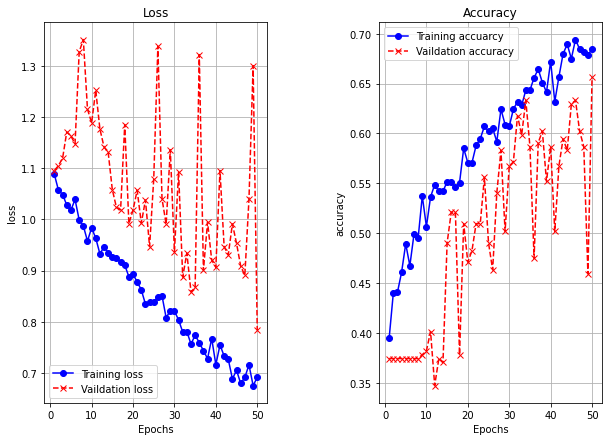

In [11]:
import matplotlib.pyplot as plt

loss = hist.history['loss']
acc = hist.history['accuracy']

val_loss = hist.history['val_loss']
val_acc = hist.history['val_accuracy']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(10,7))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'rx--', label='Vaildation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'bo-', label='Training accuarcy')
plt.plot(epochs, val_acc, 'rx--', label='Vaildation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.grid()
plt.legend()

In [12]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import numpy as np

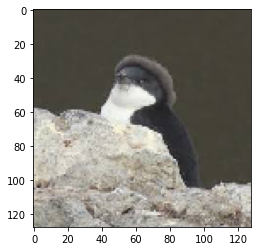

numpy array size :  (128, 128, 3)
1/1 [==============================] - 1s 997ms/step
결과 :  king penguin


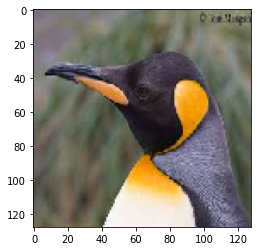

numpy array size :  (128, 128, 3)
1/1 [==============================] - 0s 37ms/step
결과 :  gentoo penguin


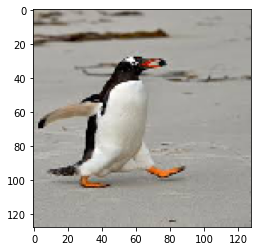

numpy array size :  (128, 128, 3)
1/1 [==============================] - 0s 31ms/step
결과 :  king penguin


In [13]:
img_height = 128
img_width = 128

filename = ['/Users/bh/kears/iamge/test/adélie penguin/adélie_penguin_95.jpg','/Users/bh/kears/iamge/test/king penguin/king penguin44.jpg','/Users/bh/kears/iamge/test/gentoo penguin/gentoo_penguin_45.jpg']

predict_dictionary = {0:'adelie penguin',1:'king penguin',2: 'gentoo penguin'}

for file in filename:
    original = load_img(file, target_size = (img_height,img_width))

    numpy_image = img_to_array(original)
    plt.imshow(np.uint8(numpy_image))
    plt.show()
    print("numpy array size : ", numpy_image.shape)
    image_batch = np.expand_dims(numpy_image , axis = 0)

    predict = np.argmax(model.predict(image_batch/128.))

    print('결과 : ',predict_dictionary[predict])

In [14]:
#model.save_weights('/Users/bh/kears/onlyAgu/weight')

In [15]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./128)
test_dir = '/Users/bh/kears/iamge/test'
test_Gen = test_datagen.flow_from_directory(test_dir, batch_size = 32)
loss, accuracy = model.evaluate(test_Gen,
                                steps = test_Gen.samples/test_Gen.batch_size)

print('Loss = {:.5f}'.format(loss))
print('Acc - {:.5f}'.format(accuracy))

Found 326 images belonging to 3 classes.
10/10 [==============================] - 5s 450ms/step - loss: 0.8744 - accuracy: 0.6012
Loss = 0.87436
Acc - 0.60123
